## 激活函数
对于一个表达式: $y =
\begin{cases} 
0, & \text{if } (b + w_1x_1 + w_2x_2 \leq 0) \\ 
1, & \text{if } (b + w_1x_1 + w_2x_2 > 0)
\end{cases}$，
可以将其简写为: $y = h(b + w_1x_1 + w_2x_2)$，其中 $h(x) = 
\begin{cases}
0, &  (x\leq 0) \\ 
1, &  (x > 0)
\end{cases}
$</br>
此时，将 $h(x)$ 称为 **激活函数**，如下图所示：

<img src="img/neural_network/activation_function.png" alt="OR" width="500" height="500"></br>
<img src="img/neural_network/activation_function2.png" alt="OR" width="700" height="500"></br>

激活函数是连接感知机和神经网络的“桥梁”</br>

“阶跃函数”：以阈值为界，一旦输入超过阈值，就切换输出。
</br>

感知机使用了阶跃函数，如果将激活函数从阶跃函数换成其他函数，就可以进入神经网络的世界了【感知机和神经网络的主要区别就在于 **激活函数**】

</br>



## sigmoid function
$$
\large h(x) = \frac{1}{1 + e^{-x}}
$$



In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
x = np.array([-1.0, 1.0, 2.0])

sigmoid(x) # it can work, since numpy's broadcast function (the list will divide into single elements, and calculate every elements)

array([0.26894142, 0.73105858, 0.88079708])

### 阶跃函数实现

In [4]:
def step_func(x): # this form only accept x with float
    if x > 0:
        return 1
    else:
        return 0

In [5]:
def step_func(x): 
    y = x > 0 # trick of numpy
    # print(y)
    return y.astype(np.int32)

In [6]:
step_func(np.array([1.0, 2.0]))

array([1, 1], dtype=int32)

### 绘制阶跃函数图像

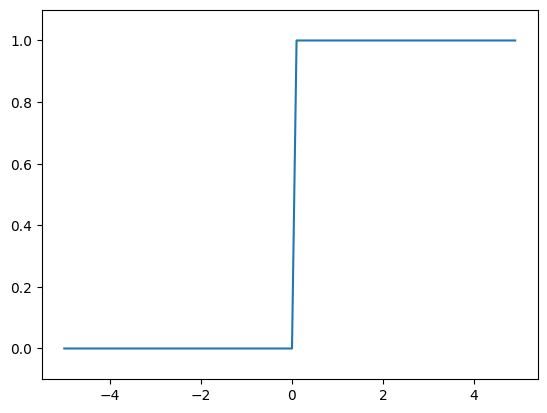

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_func(x) 

plt.plot(x, y) 
plt.ylim(-0.1, 1.1) # set the range of y
plt.show()

### 绘制 sigmoid函数图像

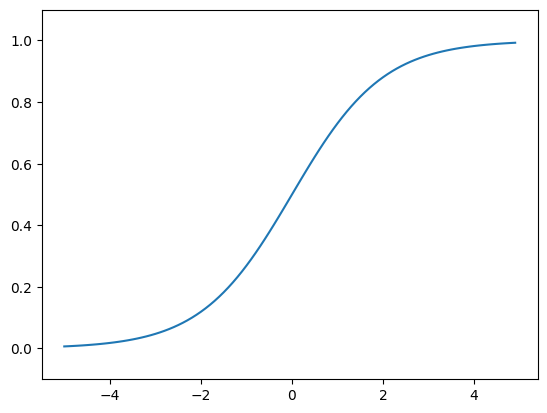

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x) 

plt.plot(x, y) 
plt.ylim(-0.1, 1.1) 
plt.show()

由上图可见：与阶跃函数不同，sigmoid函数为一条平滑曲线。**注意：sigmoid函数的平滑性对神经网络的学习具有重要意义。**</br>
也就是说，感知机中神经元之间流动的是0或1的二元信号【阶跃函数】，而神经网络中流动的是连续的实数值信号【sigmoid函数】。


上述的两种函数都是 <b>非线性函数</b></br>

神经网络的激活函数必须使用非线性函数

线性函数的问题在于，不管如何加深层数，总是存在与之等效的“无隐藏层的神经网络”</br>
解释：</br>
&nbsp;&nbsp;&nbsp;&nbsp;这里我们考虑把线性函数 $h(x) = cx$ 作为激活 函数，把 $y(x) = h(h(h(x)))$ 的运算对应 3 层神经网络。这个运算会进行 $y(x) = c × c × c × x$ 的乘法运算，但是同样的处理可以由 $y(x) = ax$（注意， $a = c^3$ ）这一次乘法运算（即没有隐藏层的神经网络）来表示。


## ReLU function
$$
h(x) =
\begin{cases} 
x & (x > 0) \\
0 & (x \leq 0)
\end{cases}
$$

In [9]:
def relu(x):
    return np.maximum(0, x) # support numpy array

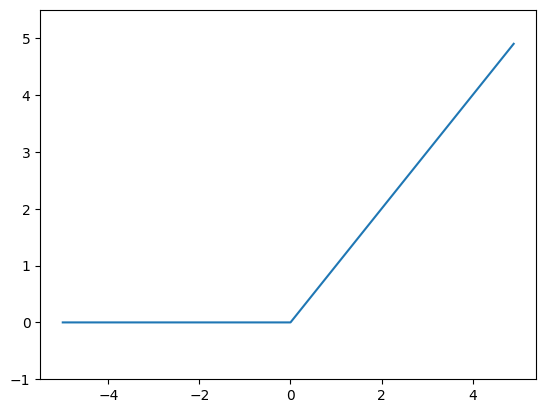

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x) 

plt.plot(x, y) 
plt.ylim(-1, 5.5) 
plt.show()

## 矩阵乘法

#### 规则
<img src="img/neural_network/matrix_dot.png" alt="OR" width="700" height="500"></br>

#### 二维数组和二维数组点乘

In [11]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])
print(f"A.dim: {A.ndim}, B.dim: {np.ndim(B)}")
print(f"A.shape: {A.shape}, B.shape: {B.shape}")

A.dim: 2, B.dim: 2
A.shape: (2, 3), B.shape: (3, 2)


In [12]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [13]:
np.dot(B, A)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

#### 二维数组和一位数组点乘

In [14]:
A = np.array([[1,2], [3, 4], [5,6]])
B = np.array([7,8]).T
B = np.array([7,8]) # in numpy don't differentiate the shape of one-dim matrix

print(f"A.dim: {A.ndim}, B.dim: {np.ndim(B)}")
print(f"A.shape: {A.shape}, B.shape: {B.shape}")
np.dot(A, B)

A.dim: 2, B.dim: 1
A.shape: (3, 2), B.shape: (2,)


array([23, 53, 83])

### 神经网络的内积

<img src="img/neural_network/matrix_dot_calc_nn.png" alt="OR" width="700" height="500"></br>
上述图片中，使用二维数组 $W$ 的每一列分别表示神经网络中的 $y1,y2,y3$

In [15]:
X = np.array([1, 2])
print(X)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
Y = np.dot(X, W)
Y

[1 2]
[[1 3 5]
 [2 4 6]]


array([ 5, 11, 17])

## 层间信号传递的实现

从输入层到第1层的第1个神经元的信号传递过程，如下图所示：</br>
<img src="img/neural_network/nn_massage_trans.png" alt="OR" width="700" height="500"></br>
其中，$w_{12}^{(1)}$ 表示从前一层的第 2 个神经元，传递到后一层的第 1 个神经元，(1)表示层号

可以使用如下数学公式进行表达：
$$
a_1^{(1)} = w_{11}^{(1)} x_1 + w_{12}^{(1)} x_2 + b_1^{(1)}
$$

此外，如果使用矩阵的乘法运算，则可以将第1层的加权和表示成下面式子：
$$
A^{(1)} = X W^{(1)} + B^{(1)}
$$

其中，$A^{(1)}$、$X$、$B^{(1)} $、$W^{(1)} $ 如下所示：

$$
A^{(1)} = 
\begin{pmatrix}
a_1^{(1)} & 
a_2^{(1)} & 
a_3^{(1)}
\end{pmatrix}, \quad
X = 
\begin{pmatrix}
x_1 & x_2
\end{pmatrix}, \quad
B^{(1)} = 
\begin{pmatrix}
b_1^{(1)} & 
b_2^{(1)} & 
b_3^{(1)}
\end{pmatrix}, \quad
W^{(1)} = 
\begin{pmatrix}
w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
w_{12}^{(1)}& w_{22}^{(1)} & w_{32}^{(1)} \\
\end{pmatrix}.
$$

In [16]:
# code 
X = np.array([1.0, 0.5])

W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])

B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2, 3) 
print(X.shape) # (2,) 
print(B1.shape) # (3,)

(2, 3)
(2,)
(3,)


### 加入激活函数

<img src="img/neural_network/nn_massage_trans_activate.png" alt="OR" width="700" height="500"></br>

In [17]:
A1 = np.dot(X, W1) + B1
print(A1)
Z1 = sigmoid(A1)
Z1

[0.3 0.7 1.1]


array([0.57444252, 0.66818777, 0.75026011])

### 第一层到第二层

<img src="img/neural_network/nn_massage_trans_1to2.png" alt="OR" width="700" height="500"></br>


In [18]:
# from 1 floor to 2 floor
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,) 
print(W2.shape) # (3, 2) 
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2 
Z2 = sigmoid(A2)
Z2

(3,)
(3, 2)
(2,)


array([0.62624937, 0.7710107 ])

### 第二层到输出层

<img src="img/neural_network/nn_massage_trans_2to_output.png" alt="OR" width="700" height="500"></br>

In [19]:
def identity_function(x): # equal function
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3 

Y = identity_function(A3) # or Y = A3
Y

array([0.31682708, 0.69627909])

In [21]:
# code summary (implement neural network by numpy)
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1) 
    a2 = np.dot(z1, W2) + b2 
    z2 = sigmoid(a2) 
    a3 = np.dot(z2, W3) + b3 
    y = identity_function(a3)

    return y

network = init_network()

x = np.array([1.0, 0.5])

y = forward(network, x) 

print(y) # [0.31682708 0.69627909]

[0.31682708 0.69627909]


#### 输出层所用的激活函数，要根据求解问题的性质决定。一般地，回归问题可以使用恒等函数，二元分类问题可以使用sigmoid函数， 多元分类问题可以使用softmax函数。

## 输出层的设计
&nbsp;&nbsp;&nbsp;&nbsp;**一般而言，回归问题用恒等函数，分类问题用softmax函数。**

</br>

## Softmax function
$$
\large y_k = \frac{e^{a_k}}{\sum_{i=1}^n e^{a_i}}
$$

In [25]:
# softmax implement
def softmax(a):
    exp_a = np.exp(a) 
    sum_exp_a = np.sum(exp_a) 
    y = exp_a / sum_exp_a

    return y

In [27]:
a = np.array([0.3, 2.9, 4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

#### 使用 softmax 作为激活函数时，注意指数 $e$ 的上溢出问题。在计算时可以同时减去一个较大的值，防止上溢出

In [30]:
# Overflow Example
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))

[nan nan nan]


/var/folders/gy/6wf0tc3n7276h9vd9dqcpkvw0000gn/T/ipykernel_26058/2224693528.py:3: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a)))
/var/folders/gy/6wf0tc3n7276h9vd9dqcpkvw0000gn/T/ipykernel_26058/2224693528.py:3: RuntimeWarning: invalid value encountered in divide
  print(np.exp(a) / np.sum(np.exp(a)))


In [33]:
c = max(a)
print(a - c)
np.exp(a - c) / np.sum(np.exp(a - c))

[  0 -10 -20]


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

## Softmax function modified
$$
\large y_k = \frac{e^{a_k + C^\prime}}{\sum_{i=1}^n e^{a_i + C^\prime}}
$$
其中，$C^\prime$ 为任意常数


#### 函数特征：
1. softmax 函数的输出是0.0到1.0之间的实数【可以理解为概率，对于一般的分类问题，值越大说明概率越大】
2. 一般而言，神经网络只把输出值最大的神经元所对应的类别作为识别结果。
3. 输出层的神经元数量需要根据待解决的问题来决定。对于分类问题，输 出层的神经元数量一般设定为类别的数量。
4. 这个推理函数，被称为 **前向传播（forward propagation）**

In [34]:
def softmax(a):
    c = np.max(a) 
    exp_a = np.exp(a - c) # 溢出对策 
    sum_exp_a = np.sum(exp_a) 
    y = exp_a / sum_exp_a
    
    return y

In [35]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0